# Artificial Neural Networks as Universal Function Approximators Part II

In the previous section, we discussed artificial neural networks as function approximators, with the intention of using them to replace the tables used to store Q-values in algorithms such as Q-learning and SARSA. We explored the concept of linear separability, which refers to the ability to separate data or points by a line, plane, or hyperplane when we represent them in the space of their coordinates, i.e., the space defined by axes corresponding to each feature (corresponding to a position in the vector of the datapoint). With a single layer of neurons, we are limited to learning problems that are linearly separable. To tackle more complex problems, we need several layers as well as a non-linear activation function. These modifications introduce the necessary non-linearity that allows the network to model complex patterns in data that single-layer networks cannot, thus broadening the scope of challenges the network can learn from and solve.

## The simplest non-linearly separable problem
XOR is the simplest non-linearly separable problem because it requires two lines to separate the classes 0 and 1. A layer of neurons will be unable to learn it.

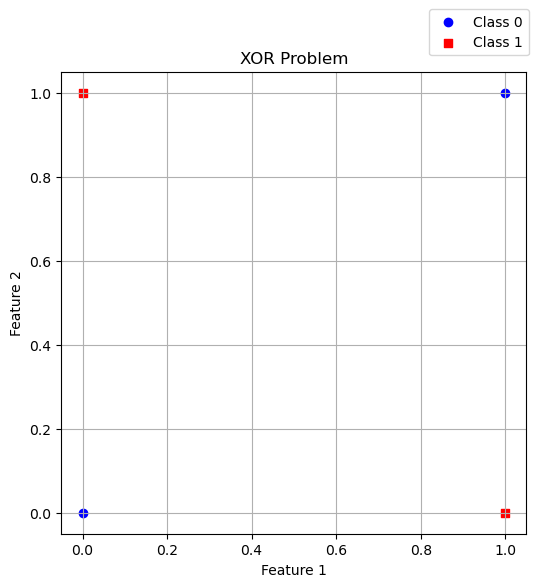

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Plot XOR data points
plt.figure(figsize=(6, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', marker='o', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', marker='s', label='Class 1')

# Labeling and formatting
plt.title('XOR Problem')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right', bbox_to_anchor=(1.02, 1.15))
plt.grid(True)
plt.show()

# Exersise 

You have the task of learning the function of a noisy OR function, using a single layer of neurons. You can play with the script; report your best performance.

The code uses the He initialization to initialize the weights of the network, for more information see here: https://arxiv.org/abs/1502.01852v1

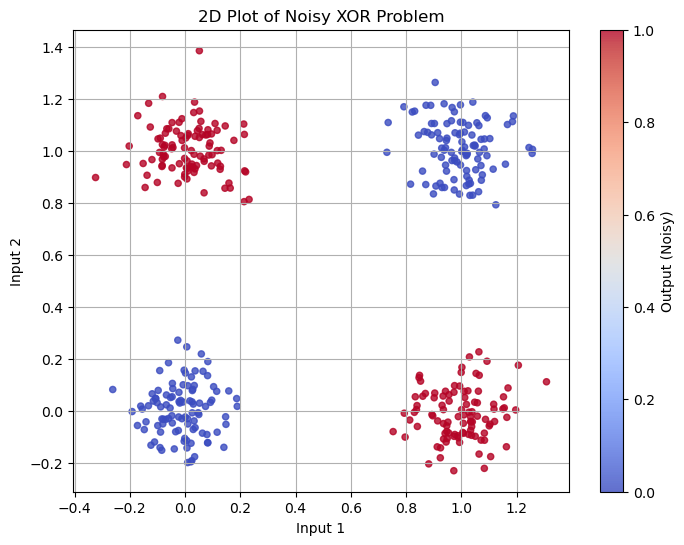

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define original XOR function inputs and outputs
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.array([0, 1, 1, 0])

# Generate noisy data around the original XOR function outputs to form clusters
np.random.seed(42)  # For reproducibility
import numpy as np
import matplotlib.pyplot as plt

# Generate noisy data around the original OR function outputs to form clusters
np.random.seed(42)  # For reproducibility

# Define the number of noisy points per original point
num_noisy_points = 100

# Initialize arrays to hold noisy inputs and outputs
noisy_inputs = []
noisy_outputs = []

# Generate noisy data around each of the original OR function points
for input_point, output_point in zip(inputs, outputs):
    # Generate noisy inputs around the current point
    noisy_inputs.append(input_point + np.random.normal(0, 0.1, size=(num_noisy_points, 2)))
    # Generate noisy outputs around the current output (0 or 1)
    noisy_outputs.append(np.ones(num_noisy_points) * output_point)

# Convert the lists of arrays into single numpy arrays
noisy_inputs = np.concatenate(noisy_inputs)
noisy_outputs = np.concatenate(noisy_outputs)

# Plot the noisy XOR data points in 2D
plt.figure(figsize=(8, 6))
plt.scatter(noisy_inputs[:, 0], noisy_inputs[:, 1], c=noisy_outputs, cmap='coolwarm', s=20, alpha=0.8)
plt.colorbar(label='Output (Noisy)')
plt.title('2D Plot of Noisy XOR Problem')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.grid(True)
plt.show()


# Solution

In [3]:
import numpy as np

# Generate XOR data with noise
def generate_noisy_or_data(samples, noise_level=0.1):
    x = np.random.randint(2, size=(samples, 2))
    y = np.bitwise_xor(x[:, 0], x[:, 1]).reshape(-1, 1)
    x_noisy = x + np.random.normal(0, noise_level, x.shape)
    y_noisy = y + np.random.normal(0, noise_level, y.shape)
    return x_noisy, y_noisy

class SingleLayerModel:
    def __init__(self, input_dim, output_dim):
        # He initialization
        self.W = np.random.randn(input_dim, output_dim) * np.sqrt(2. / input_dim)
        self.b = np.zeros((output_dim,))
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward(self, X):
        h = np.dot(X, self.W) + self.b
        y = self.sigmoid(h)
        return y

    def train(self, X, y_t, learning_rate, epochs):
        for epoch in range(epochs):
            y_pred = self.forward(X)
            error = y_pred - y_t
            delta = error * y_pred * (1 - y_pred)
            dW = np.dot(X.T, delta) / X.shape[0]
            db = np.sum(delta, axis=0) / X.shape[0]

            self.W -= learning_rate * dW
            self.b -= learning_rate * db
            
            if epoch % 100 == 0:
                loss = np.mean(0.5 * (error ** 2))
                print(f"Epoch {epoch}, Loss: {loss}")

# Generate data
training_data = generate_noisy_or_data(2000)
validation_data = generate_noisy_or_data(300)

# Instantiate and train the model
model = SingleLayerModel(2, 1)  # 2 inputs, 1 output
model.train(training_data[0], training_data[1], learning_rate=0.1, epochs=2000)

# Evaluate the model's performance
def evaluate_model(model, data):
    X_test, y_test = data
    predictions = model.forward(X_test)
    decisions = predictions > 0.5
    accuracy = np.mean(decisions == np.round(y_test))
    return accuracy

validation_accuracy = evaluate_model(model, validation_data)
print(f"Model Validation Accuracy: {validation_accuracy}")


Epoch 0, Loss: 0.14531537249767462
Epoch 100, Loss: 0.13960259165988131
Epoch 200, Loss: 0.1372118731787945
Epoch 300, Loss: 0.13573806217626339
Epoch 400, Loss: 0.13460906204353243
Epoch 500, Loss: 0.13369934304651468
Epoch 600, Loss: 0.13296709666848056
Epoch 700, Loss: 0.1323843281693408
Epoch 800, Loss: 0.13192593848279682
Epoch 900, Loss: 0.13156901138895535
Epoch 1000, Loss: 0.131293355826401
Epoch 1100, Loss: 0.1310818236735817
Epoch 1200, Loss: 0.13092028258433003
Epoch 1300, Loss: 0.13079735500689826
Epoch 1400, Loss: 0.13070404361318994
Epoch 1500, Loss: 0.1306333290212388
Epoch 1600, Loss: 0.13057979028681663
Epoch 1700, Loss: 0.13053927234754803
Epoch 1800, Loss: 0.13050860795862132
Epoch 1900, Loss: 0.1304853924213133
Model Validation Accuracy: 0.7533333333333333


## Derivation of the Backpropagation Algorithm for the Hidden Layers with Sigmoid Activation

Building on the methodology established previously for a single neuron, we now extend our focus to the hidden layer of a neural network, assuming a sigmoid activation function throughout. The backpropagation for the hidden layer is key for training deeper networks where the error must be propagated through multiple layers.

For the following derivation, we will assume a network with one hidden layer, indexing on the output neurons $i$, on the last hidden neurons $j$, and on the penultimate hidden layer neurons $k$.

### Error Propagation to the Last Hidden Layer

Given the output layer's error gradient $\frac{\partial E}{\partial y_i}$ for each neuron $i$ (derived from the output layer's calculations), we calculate the error gradient for each neuron $j$ in the hidden layer. This is achieved through the backpropagation of the error, leveraging the chain rule:

$$
\frac{\partial E}{\partial y_j} = \sum_i \frac{\partial E}{\partial y_i} \frac{\partial y_i}{\partial y_j},
$$

where $\sum_i$ encompasses all neurons $i$ to which neuron $j$ sends output, and $f$ is an activation function, in this case, the sigmoid. Since: 

$$
y_i = f\left(\sum_j w_{ij} y_j + b_i\right) = f\left(h_i\right),
$$

we can write

$$\frac{\partial y_i}{\partial y_j} = f'(h_i) w_{ij},$$ 

with $w_{ij}$ representing the weight from neuron $j$ to neuron $i$, and $f'(h_i)$ is the derivative of the sigmoid function, $f'(h_i) = f(h_i)\left(1-f(h_i)\right) = y_i(1 - y_i)$.

Hence:

$$
\frac{\partial E}{\partial y_j} =  \sum_i \frac{\partial E}{\partial y_i} f'(h_i) w_{ij}.
$$

### Gradient Calculation for Weight Update

The gradient of the error with respect to the weight $w_{jk}$ connecting neuron $k$ to neuron $j$ in the hidden layer, $\frac{\partial E}{\partial w_{jk}}$, is calculated by:

$$
\frac{\partial E}{\partial w_{jk}} = \frac{\partial E}{\partial y_j} \frac{\partial y_j}{\partial w_{jk}}.
$$

We need to calculate $\frac{\partial y_j}{\partial w_{jk}}$. We remind ourselves that:

$$
y_j = f\left(\sum_k w_{jk} y_k + b_j\right) = f\left(h_j\right),
$$

leading to

$$
\frac{\partial E}{\partial w_{jk}} = \frac{\partial E}{\partial y_j} f'(h_j) y_k.
$$

### Weight Update Rule

Consequently, the update rule for the weight $w_{jk}$ becomes:

$$
\Delta w_{jk} = -\eta \frac{\partial E}{\partial w_{jk}} = -\eta \frac{\partial E}{\partial y_j} f'(h_j) y_k,
$$

where $\eta$ is the learning rate. 

Replacing from the equations before, we get:

$$
\Delta w_{jk} = -\eta \left(\sum_i \frac{\partial E}{\partial y_i} f'(h_i) w_{ij}\right) f'(h_j) y_k.
$$

This update rule reflects how changes to the weights in the hidden layer should be adjusted based on the propagated error from the output back through the network.

### Bias Update Rule

Similarly, the update rule for the bias $b_j$ for each neuron $j$ is derived by considering the bias as a weight connected to an input of 1. Therefore, in the equations of the bias, we can simply set $y_k=1$. The bias update rule is given by:

$$
\Delta b_j = -\eta \left(\sum_i \frac{\partial E}{\partial y_i} f'(h_i) w_{ij}\right) f'(h_j).
$$


### Generalisable Update Rule Using Delta Terms

To write this more elegantly we define:

$$\delta_i = \frac{\partial E}{\partial y_i} f'(h_i)$$ and

$$\delta_j = \sum_i \delta_i w_{ij} f'(h_j).$$

This allows us to write the equation in the following form:

$$
\Delta w_{jk} = -\eta \delta_j y_k,
$$

and

$$
\Delta b_{j} = -\eta \delta_j.
$$


This is a simplified and generalised form of the weight update rule using the $\delta$ notation, making it easier to implement and understand, especially when generalising to multiple layers.


### Derivative of the Error Function Across the Batch

In the previous session, we defined an error function:

$$
E = \frac{1}{2n} \sum_{\mathbf{x}} \left( y_i^t(\mathbf{x}) - y_i(\mathbf{x}; \mathbf{W}) \right)^2,
$$

where $y_i^t(\mathbf{x})$ is the target output for the input $\mathbf{x}$, $n$ the number of samples $\mathbf{x}$, and $y_i(\mathbf{x}; \mathbf{W})$ represents the neuron's output for $\mathbf{x}$ given the weights $\mathbf{W}$.

The derivative of $E$ with respect to $y_i$ across the batch is calculated as follows:

$$
\frac{\partial E}{\partial y_i} = \frac{1}{n} \sum_{\mathbf{x}} (y_i(\mathbf{x}; \mathbf{W}) - y_i^t(\mathbf{x})).
$$

This formula represents how the prediction error for each output neuron $i$ influences the total error $E$ across all inputs $\mathbf{x}$ in the batch, adjusted for the impact of the activation function.



# Exercise

Derive the update rules for both weights and biases in a neural network using the backpropagation algorithm with Mean Squared Error (MSE) as the error function and the ReLU (Rectified Linear Unit) activation function.


## Solution

### Network and Functions Setup
- **Loss Function (MSE)**:
  $$
  E = \frac{1}{2n} \sum_{\mathbf{x}} \left( y_i^t(\mathbf{x}) - y_i(\mathbf{x}; \mathbf{W}) \right)^2
  $$

- **ReLU Activation**:
  $$
  f(x) = \max(0, x)
  $$
  $$
  f'(x) = \begin{cases} 
  1 & \text{if } x > 0, \\
  0 & \text{otherwise}.
  \end{cases}
  $$

### Derivation of Update Rules
- **Gradient of Error w.r.t. Output**:
  $$
  \frac{\partial E}{\partial y_i} = \frac{1}{n} \sum_{\mathbf{x}} (y_i(\mathbf{x}; \mathbf{W}) - y_i^t(\mathbf{x}))
  $$

- **Backpropagation to Hidden Layer**:
  $$
  \frac{\partial E}{\partial y_j} = \sum_i \left(\frac{\partial E}{\partial y_i} \cdot w_{ij} \cdot f'(h_j)\right)
  $$
  where $h_j = \sum_k w_{jk} x_k + b_j$.

- **Update Rule for Weights**:
  $$
  \Delta w_{jk} = -\eta \left(\frac{\partial E}{\partial y_j} \cdot x_k\right)
  $$
  This rule applies when $h_j > 0$ (since $f'(h_j) = 0$ when $h_j \leq 0$).

- **Update Rule for Biases**:
  $$
  \Delta b_j = -\eta \frac{\partial E}{\partial y_j}
  $$
  Similar to weights, this applies when $h_j > 0$.

The ReLU derivative impacts the backpropagation by zeroing the gradient contribution from neurons that are not active (i.e., those for which $h_j \leq 0$).

### Explaining the Forward and Backward Pass of the algorithm

#### Forward Pass

In the forward pass, the input data is passed through the network layer by layer to produce the output. This process involves calculating the weighted sum of the inputs, adding the bias, and then applying the activation function to produce the neuron's output. For a neuron $j$ in the hidden layer, the process is mathematically represented as:

$$
h_j = \sum_k w_{jk} y_k + b_j,
$$
$$
y_j = f(h_j) = \frac{1}{1 + e^{-h_j}},
$$

where $w_{jk}$ is the weight from neuron $k$ in the previous layer to neuron $j$, $y_k$ is the output of neuron $k$, and $b_j$ is the bias associated with neuron $j$. The activation function $f$ used here is the sigmoid function, which smoothly limits the output between 0 and 1, making it a popular choice for binary classification problems.

#### Backward Pass

The backward pass involves computing the gradient of the loss function with respect to each weight in the network by applying the chain rule — a method known as backpropagation. This is crucial for learning, as it guides how the weights should be updated to minimize the error. The steps include:

1. **Compute Output Error**: Calculate the error at the output layer. The error is the difference between the actual output and the predicted output from the forward pass. For an output neuron $i$, the error gradient with respect to its output is calculated as follows:

$$
\frac{\partial E}{\partial y_i} = (y_i - y_i^t) f'(h_i),
$$

where $y_i^t$ is the target output, and $f'(h_i) = y_i(1 - y_i)$ is the derivative of the sigmoid function.

2. **Propagate Error Backwards**: Using the chain rule, propagate this error backward from the output layer to hidden layers. For each neuron $j$ in the hidden layer, the error gradient is:

$$
\frac{\partial E}{\partial y_j} = \sum_i \left( \frac{\partial E}{\partial y_i} \frac{\partial y_i}{\partial y_j} \right) = \sum_i \left( \frac{\partial E}{\partial y_i} w_{ij} f'(h_j) \right),
$$

which computes how much each neuron $j$ has contributed to the error in the output.

3. **Update Weights and Biases**: Finally, update the weights and biases based on the gradients calculated. This adjustment is done using gradient descent to minimize the error function. For each weight $w_{jk}$, the update is:

$$
w_{jk} \leftarrow w_{jk} - \eta \frac{\partial E}{\partial w_{jk}},
$$

where $\eta$ is the learning rate, and $\frac{\partial E}{\partial w_{jk}}$ is derived as explained previously.

The cycle of a forward pass followed by a backward pass constitutes one iteration or step in the training process. Multiple iterations over the entire training set (epochs) are typically required to adequately minimize the loss and converge to a stable set of weights.import numpy as np

### Training 
As a reminder, an **epoch** refers to a single pass of the entire training dataset through the learning algorithm. Through iterative updates across multiple epochs, the network tunes these weights to minimise the overall error, aiming to accurately model the underlying function and improve generalisation to unseen data.

To ensure the function is appropriately learned, i.e., it can generalise to achieve good performance with unseen data, we utilise additional samples to form a test set. This test set should **not** have been used in any capacity to tune the model, see also discussion on training validation and testing of the previous section.

### Efficient coding
Similar to the previous session, here we propose a setup for efficinelty implementing the update rules of the hidden layer.

```python

import numpy as np

# Placeholder definitions for demonstration
X = ...  # Input data matrix from the dataset, shape (batch_size, input_dim)
h1 = ...  # Pre-activation at the hidden layer, shape (batch_size, hidden_layer_output_dim)
h = ...  # Pre-activation at the output layer, shape (batch_size, output_dim)
y_t = ...  # Target values matrix, shape (batch_size, output_dim)
W_hidden = ...  # Weight matrix for the hidden layer, shape (hidden_layer_input_dim, hidden_layer_output_dim)
W_output = ...  # Weight matrix for the output layer, shape (hidden_layer_output_dim, output_dim)
b_hidden = ...  # Bias vector for the hidden layer, shape (hidden_layer_output_dim,)
b_output = ...  # Bias vector for the output layer, shape (output_dim,)
learning_rate = ...  # Learning rate, a scalar

# Define the activation function and its derivative as placeholders
def activation_function(x):
    return np.maximum(0, x)  # Example placeholder, replace with any activation function

def activation_derivative(x):
    return (x > 0).astype(float)  # Example for ReLU, replace with appropriate derivative

#Note: when you are using sigmoid you do not need to use the preactivation player for the derivative because it happens that the derivative equals to postactivation x (1-postactivation); in other words instead of activation_derivative(h) you can do y*(1-y)


# Calculate activations
y1 = activation_function(h1)
y = activation_function(h)

# Output layer error and delta calculation
error_output = y - y_t
delta_output = error_output * activation_derivative(h)  # Use pre-activation 'h'

# Hidden layer delta calculation
delta_hidden = np.matmul(delta_output, W_output.T) * activation_derivative(h1)  # Use pre-activation 'h1'

# Update equations for weights and biases in both layers
update_weights_output = -learning_rate * np.matmul(y1.T, delta_output) / X.shape[0]
update_biases_output = -learning_rate * np.sum(delta_output, axis=0) / X.shape[0]

update_weights_hidden = -learning_rate * np.matmul(X.T, delta_hidden) / X.shape[0]
update_biases_hidden = -learning_rate * np.sum(delta_hidden, axis=0) / X.shape[0]

# Applying updates to weights and biases
W_output += update_weights_output
b_output += update_biases_output
W_hidden += update_weights_hidden
b_hidden += update_biases_hidden

# Exercise  


## The Importance of Non-linear Activation Functions

We have discussed several times the importance of non-linear functions. In this exercise, you will demonstrate this using simple maths. Assume a small feedforward neural network with two input units, two hidden units, and one output unit. For simplicity, we will call the input units $x_1$ and $x_2$, the hidden units $x_3$ and $x_4$, and the output unit $x_5$. Their corresponding weights will be as we have defined them earlier: $w_{31}$ is the weight from unit 1 to 3, $w_{41}$ from unit 1 to 4, etc. Calculate the output units as a function of the input units. Redefine a neural network with two input units and one output that for different equivalent weights can perform the same task. What are these different weights?



## Solution

### Step 1: Define a Small Feedforward Neural Network with Linear Activations

**Network Structure:**
- **Input Units**: $x_1$ and $x_2$
- **Hidden Units**: $x_3$ and $x_4$
- **Output Unit**: $x_5$

**Weights:**
- $w_{31}$ is the weight from $x_1$ to $x_3$
- $w_{32}$ is the weight from $x_2$ to $x_3$
- $w_{41}$ is the weight from $x_1$ to $x_4$
- $w_{42}$ is the weight from $x_2$ to $x_4$
- $w_{53}$ is the weight from $x_3$ to $x_5$
- $w_{54}$ is the weight from $x_4$ to $x_5$

**Biases** (omitted for simplicity in equations):
- $b_3$, $b_4$, and $b_5$

### Step 2: Calculate the Output Using Linear Activations

If all activation functions are linear (i.e., identity functions where the output equals the input), the outputs of the hidden units $x_3$ and $x_4$ are linear combinations of the inputs:

$$x_3 = w_{31} x_1 + w_{32} x_2$$
$$x_4 = w_{41} x_1 + w_{42} x_2$$

The output of the network, $x_5$, being a linear combination of the outputs from the hidden units, is:

$$x_5 = w_{53} x_3 + w_{54} x_4$$

Substituting the values of $x_3$ and $x_4$ from the above, we get:

$$x_5 = (w_{53} w_{31} + w_{54} w_{41}) x_1 + (w_{53} w_{32} + w_{54} w_{42}) x_2$$

Let:
- $W_1 = w_{53} w_{31} + w_{54} w_{41}$
- $W_2 = w_{53} w_{32} + w_{54} w_{42}$

Thus, $x_5$ simplifies to:
$$x_5 = W_1 x_1 + W_2 x_2$$

### Step 3: Redefine a Simpler Network

**Observation:**
- The multi-layer linear network essentially performs as a single-layer linear network with the inputs directly connected to the output through new weights $W_1$ and $W_2$.

### Step 4: Equivalent Weights for the Single-Layer Network

For a single-layer network performing the same task, you directly connect $x_1$ and $x_2$ to $x_5$ with weights $W_1$ and $W_2$. These weights are equivalent to the combinations derived from the two-layer network:

$$W_1 = w_{53} w_{31} + w_{54} w_{41}$$
$$W_2 = w_{53} w_{32} + w_{54} w_{42}$$

### Conclusion

Without non-linear activation functions, adding more layers does not increase the model's capacity to learn complex patterns since it only extends the linear transformation, not contributing to additional complexity or abstraction capability. Non-linear activations enable neural networks to learn non-linear relationships, crucial for tasks like classifying non-linearly separable patterns such as XOR.



# Exercise 

In the previous example of modelling the noisy XOR add a hidden layer. What is the performance now?

## Solution

In [4]:
#With data suffling
import numpy as np

# Function to generate XOR data with noise
def generate_noisy_or_data(samples, noise_level=0.1):
    x = np.random.randint(2, size=(samples, 2))
    y = np.bitwise_xor(x[:, 0], x[:, 1]).reshape(-1, 1)
    x_noisy = x + np.random.normal(0, noise_level, x.shape)
    y_noisy = y + np.random.normal(0, noise_level, y.shape)
    return x_noisy, y_noisy

class MultiLayerModel:
    def __init__(self, input_dim, hidden_dim, output_dim):
        self.W1 = np.random.randn(input_dim, hidden_dim) * np.sqrt(2. / input_dim)
        self.b1 = np.zeros((hidden_dim,))
        self.W2 = np.random.randn(hidden_dim, output_dim) * np.sqrt(2. / hidden_dim)
        self.b2 = np.zeros((output_dim,))

    def relu(self, x):
        return np.maximum(0, x)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        return self.sigmoid(self.z2)

    def train(self, X, y_t, learning_rate, epochs):
        n_samples = X.shape[0]
        for epoch in range(epochs):
            # Shuffle the data at the beginning of each epoch
            indices = np.arange(n_samples)
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_t_shuffled = y_t[indices]

            # Forward pass
            y_pred = self.forward(X_shuffled)
            error = y_pred - y_t_shuffled

            # Backpropagation
            delta2 = error * y_pred * (1 - y_pred)
            dW2 = np.dot(self.a1.T, delta2) / n_samples
            db2 = np.sum(delta2, axis=0) / n_samples
            delta1 = np.dot(delta2, self.W2.T) * (self.z1 > 0)
            dW1 = np.dot(X_shuffled.T, delta1) / n_samples
            db1 = np.sum(delta1, axis=0) / n_samples

            # Update weights and biases
            self.W2 -= learning_rate * dW2
            self.b2 -= learning_rate * db2
            self.W1 -= learning_rate * dW1
            self.b1 -= learning_rate * db1

            if epoch % 100 == 0:
                loss = np.mean(0.5 * (error ** 2))
                print(f"Epoch {epoch}, Loss: {loss}")

# Generate datasets
training_data = generate_noisy_or_data(3000)
validation_data = generate_noisy_or_data(300)
test_data = generate_noisy_or_data(300)

# Instantiate and train the model
model = MultiLayerModel(2, 4, 1)  # 2 inputs, 4 hidden neurons, 1 output
model.train(training_data[0], training_data[1], learning_rate=0.1, epochs=2000)

# Evaluate the model's performance
def evaluate_model(model, data):
    X_test, y_test = data
    predictions = model.forward(X_test)
    decisions = predictions > 0.5
    accuracy = np.mean(decisions == np.round(y_test))
    return accuracy

# Evaluation
validation_accuracy = evaluate_model(model, validation_data)
print(f"Model Validation Accuracy: {validation_accuracy}")
test_accuracy = evaluate_model(model, test_data)
print(f"Model Test Accuracy: {test_accuracy}")


Epoch 0, Loss: 0.13783431051498793
Epoch 100, Loss: 0.12066835070997305
Epoch 200, Loss: 0.1129553463622451
Epoch 300, Loss: 0.10741710524759579
Epoch 400, Loss: 0.1017814375481056
Epoch 500, Loss: 0.09635475285205945
Epoch 600, Loss: 0.09146112923413637
Epoch 700, Loss: 0.08729345744241622
Epoch 800, Loss: 0.08387912063086171
Epoch 900, Loss: 0.08113947562788502
Epoch 1000, Loss: 0.07895556899251081
Epoch 1100, Loss: 0.07720879728523625
Epoch 1200, Loss: 0.07580110324374208
Epoch 1300, Loss: 0.07466914176999702
Epoch 1400, Loss: 0.07374987741375377
Epoch 1500, Loss: 0.07299150812503966
Epoch 1600, Loss: 0.07235452433479117
Epoch 1700, Loss: 0.07181811426657116
Epoch 1800, Loss: 0.07136260770220125
Epoch 1900, Loss: 0.07097280916325707
Model Validation Accuracy: 0.7766666666666666
Model Test Accuracy: 0.7566666666666667


## Replacing the Q-values Table with an ANN in Q-learning

Single neurons can learn linear relationships and solve linearly separable problems. Consider, for instance, the linear track problem. It is feasible to use a perceptron to replace the Q-values table because the Q-values are expected to increase linearly from the starting state to the penultimate state, after which a reward is collected. Although approximating Q-values with a neural network is not necessary due to the simplicity of the problem, it serves as a useful demonstration.

The approach to replace the Q-values table involves using a neural network with two outputs, corresponding to the two possible actions (forward and backward). The input to this network is the state of the agent.

We will employ the Mean Squared Error (MSE) and assume a ReLU activation function for the neurons:

$$
E = \frac{1}{2n} \sum_{i} \sum_{\mathbf{x}} \left( y_i^t(\mathbf{x}) - y_i(\mathbf{x}; \mathbf{W}) \right)^2,
$$

The outputs of the network represent the Q-values. However, we cannot modify neurons directly; instead, we must adjust their synapses.

$$y_i(\mathbf{x}) = Q(\mathbf{x}, i) = Q(s, a).$$

The network's target is defined as:

$$y_i^t(\mathbf{x}) = r + \gamma \max_{i'} Q(\mathbf{x}', i') = r + \gamma \max_{a'} Q(s', a').$$

Here, $\mathbf{x}$ represents the state, and $\mathbf{x}'$ represents the next state. The index $i$ on the output neuron signifies the action, and the index $i'$ on the output neuron signifies the next action.

A simple representation for the state, especially in the case of the linear track, is a vector of zeros with a 1 in the position of the agent. While this is a straightforward representation, more complex representations are beneficial for generalisation, particularly in continuous spaces.

Mapping this scenario to the neural network and Q-table involves aligning the indices of the neurons $i$ to the actions $a$ and the inputs $\mathbf{x}$ to the states. As a representation of the states, we might consider a vector of the same size as the states containing 0 everywhere except for a 1 at the agent's position, but in other problems there will be different state representations on general.

The learning rules for a network with a single layer are:

$$
\Delta w_{ij} = \eta \frac{1}{n} \sum_{\mathbf{x}} \left(y_i^t(\mathbf{x}) - y_i(\mathbf{x})\right) \cdot \text{ReLU}'\left(\sum_j w_{ij} x_j + b_i \right) \cdot x_j,
$$

and similarly for the biases:

$$
\Delta b_{i} = \eta \frac{1}{n} \sum_{\mathbf{x}} \left(y_i^t(\mathbf{x}) - y_i(\mathbf{x})\right) \cdot \text{ReLU}'\left(\sum_j w_{ij} x_j + b_i \right).
$$

In neural network-based Q-learning, unlike in supervised learning, we only update the weights and biases corresponding to the action taken. This means the weight updates for neurons representing the Q-values of non-selected actions should be 0.

To adapt this for backpropagation with hidden layers or deeper networks, we can employ a "trick": set the targets for all outputs corresponding to non-selected actions to their actual values, and only for the action taken, we use:

$$y_a^t(\mathbf{x}) = r + \gamma \max_{a'} Q(s', a').$$

Thus, the difference ("output - target") becomes zero for pathways linked to neurons corresponding to actions that were not selected, effectively nullifying unwanted updates.


### Efficient Implementation of RL with Function Approximation

In what follows, we will discuss how to implement the learning rules for Q-learning, using an ANN with a single layer as a function approximator, efficiently with NumPy.

We need only the "reward" corresponding to the action taken. To do so, one way is to set the target equal to the outputs for all output neurons except for the one corresponding to the action taken. That latter one will have the target: $r+\gamma \max_{i'} Q(\mathbf{x}',i')$. By doing this "trick", we can achieve what we want; another way would have been to appropriately mask the gradient updates at the output layer of the network. We can also easily use neural network implementations, as the only difference is the way that the output is calculated.

This is considering a scenario where the agent simultaneously learns from many experiences stored in a buffer, from which one can samle a batch for computational efficiency, but for simplicity set batch size n=1.

```python
import numpy as np

# Placeholder definitions for demonstration
n = ...  # Number of experiences in the batch, representing the batch size
num_states = ...  # Dimensionality of the state space
num_actions = ...  # Number of possible actions

X = ...  # State representations, shape (n, num_states), X.shape[0] is equal to n
actions_taken = ...  # Actions taken, represented as indices, shape (n,)
rewards = ...  # Rewards received, shape (n,)
next_states = ...  # Next state representations, shape (n, num_states)
gamma = ...  # Discount factor for future rewards

# Neural network parameters
W = ...  # Weight matrix, shape (num_states, num_actions)
b = ...  # Bias vector, shape (num_actions,)
learning_rate = ...  # Learning rate


def activation(x):
    ...

def activation_derivative(x):
    ...

# Compute current Q-values
h=np.matmul(X, W) + b
current_q_values = activation(h)  # Shape: (n, num_actions)

# Compute Q-values for next states and select the maximum Q-value for the next state
next_q_values = activation(np.matmul(next_states, W) + b)  # Shape: (n, num_actions)
max_next_q_values = np.max(next_q_values, axis=1)  # Shape: (n,)

# Compute target Q-values
targets = rewards + gamma * max_next_q_values  # Shape: (n,)

# Adjust targets to match current Q-values for all actions except the taken action
# Initialize adjusted targets with current Q-values
adjusted_targets = np.copy(current_q_values)
# Update the target only for the taken actions across the batch
adjusted_targets[np.arange(n), actions_taken] = targets

# Calculate error term using adjusted targets
error_output=  current_q_values -adjusted_targets  # Error is zero for all actions not taken

# Element-wise multiplication of the error term and activation derivative
delta_output = error * activation_derivative(h)

#Compute gradients

grad_W = np.matmul(X.T, delta_output) / X.shape[0]
grad_b =  np.sum(delta_output, axis=0) / X.shape[0]


# Compute updates for weights and biases
W -= learning_rate * grad_W 
b -= learning_rate grad_b

# Exercise

Now take the problem of the linear track and use a perceptron to replace the Q-values table. Because of the simplicity of the problem, there is no reason to approximate the Q-values with a neural network, but it serves as a demonstration. Then, implement a hidden layer too. 

As a reminder, the linear track exercise was: "A robot is placed at the beginning of a linear track (state 0) and must navigate to a reward at the end of the track (state 5). The robot has two possible actions, "forward" and "backward". The track consists of 6 discrete states, numbered from 0 to 5. The objective is to use the Q-learning reinforcement learning algorithm to teach the robot to reach the reward in an optimal manner, which means taking the minimum number of steps."


In [5]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

class LinearTrackQAgent:
    def __init__(self, track_size, epsilon=0.05, eta=0.1, gamma=0.99):
        self.states = track_size
        self.epsilon = epsilon
        self.eta = eta
        self.gamma = gamma
        self.actions = 2
        self.W = np.random.randn(self.states, self.actions) * 0.01
        self.b = np.zeros(self.actions,)

    def choose_action(self, state):
        pass
        
    def update_Q(self, state, action, reward, next_state):
        pass


    def train(self, episodes, runs=100, max_steps=100):
        pass

    def plot_learning_progress(self, average_steps_per_episode, optimal_steps_per_episode):
        plt.plot(average_steps_per_episode, label='Average Steps per Episode')
        plt.axhline(y=optimal_steps_per_episode, color='r', linestyle='--', label='Optimal Steps')
        plt.title('Learning Progress over Episodes')
        plt.xlabel('Episode')
        plt.ylabel('Number of Steps')
        plt.legend()
        plt.show()

# Initialize the agent with a track size of 6 states
agent = LinearTrackQAgent(track_size=6,epsilon=0.01, eta=0.01, gamma=0.9)
optimal_steps_per_episode = 5

# Train the agent over 100 episodes and 10 runs, then plot the learning progress

## Solution

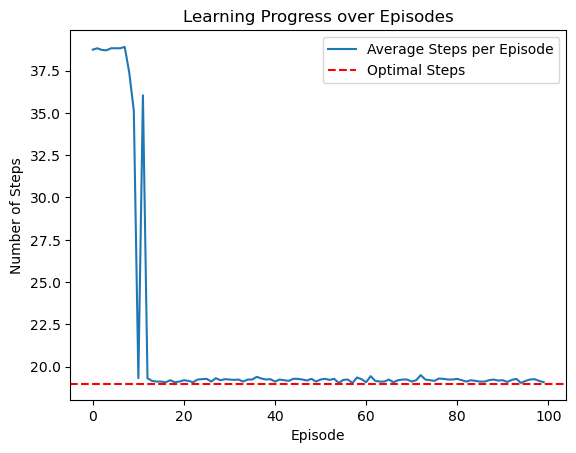

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

class LinearTrackQAgent:
    def __init__(self, track_size, epsilon=0.05, eta=0.1, gamma=0.99):
        self.states = track_size
        self.epsilon = epsilon
        self.eta = eta
        self.gamma = gamma
        self.actions = 2
        self.W = np.random.randn(self.states, self.actions) * 0.01
        self.b = np.zeros(self.actions,)

    def choose_action(self, state):
        X = np.zeros((1,self.states))
        X[0,state] = 1
        h=np.matmul(X,self.W)+ self.b
        q_values = sigmoid(h)
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.actions)
        else:
            return np.argmax(q_values)

    def update_Q(self, state, action, reward, next_state):
        X = np.zeros((1,self.states))
        X[0,state] = 1
        next_state_X= np.zeros((1,self.states))
        next_state_X[0,next_state] = 1
        
        # Compute the Q values for current and next state
        h=np.matmul(X, self.W) + self.b
        q_values = sigmoid(h)
        next_q_values = sigmoid(np.dot(next_state_X, self.W) + self.b)
        
        # Compute the TD target and error
        target = reward + self.gamma * np.max(next_q_values)

        adjusted_target = np.copy(q_values)
        # Update the target only for the taken actions across the batch
        adjusted_target[0, action] = target
        error =  (q_values -adjusted_target) * sigmoid_derivative(h) 
 
        # Update gradient calculation to use the correct action index

        grad_W = np.matmul(X.T, error) / X.shape[0]
        grad_b = np.sum(error, axis=0) / X.shape[0]
        
        self.W -= self.eta * grad_W
        self.b -= self.eta * grad_b


    def train(self, episodes, runs=100, max_steps=100):
        steps_run_episode = np.zeros((runs, episodes))
        for run in range(runs):
            for episode in range(episodes):
                state = 0
                steps = 0
                while state < self.states - 1 and steps < max_steps:
                    action = self.choose_action(state)
                    next_state = state + 1 if action == 1 else max(0, state - 1)
                    reward = 1 if next_state == self.states - 1 else 0
                    self.update_Q(state, action, reward, next_state)
                    state = next_state
                    steps += 1
                steps_run_episode[run, episode] = steps
        return steps_run_episode

    def plot_learning_progress(self, average_steps_per_episode, optimal_steps_per_episode):
        plt.plot(average_steps_per_episode, label='Average Steps per Episode')
        plt.axhline(y=optimal_steps_per_episode, color='r', linestyle='--', label='Optimal Steps')
        plt.title('Learning Progress over Episodes')
        plt.xlabel('Episode')
        plt.ylabel('Number of Steps')
        plt.legend()
        plt.show()

# Initialize the agent with a track size of 6 states

states=20

agent = LinearTrackQAgent(track_size=states,epsilon=0.01, eta=0.01, gamma=0.99)
optimal_steps_per_episode = states-1

# Train the agent over 100 episodes and 10 runs, then plot the learning progress
steps_run_episode = agent.train(episodes=100, runs=50, max_steps=1000)
average_steps_per_episode = np.mean(steps_run_episode, axis=0)
agent.plot_learning_progress(average_steps_per_episode, optimal_steps_per_episode)

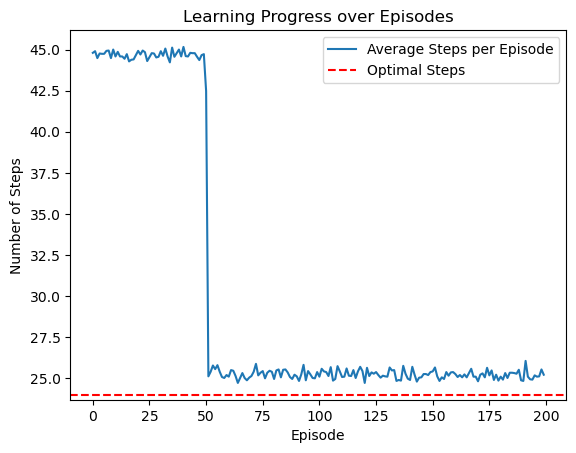

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

class LinearTrackQAgent:
    def __init__(self, track_size, hidden_size=10, epsilon=0.05, eta=0.1, gamma=0.99):
        self.states = track_size
        self.hidden_size = hidden_size
        self.epsilon = epsilon
        self.eta = eta
        self.gamma = gamma
        self.actions = 2
        self.W1 = np.random.randn(self.states, self.hidden_size) * 0.01
        self.b1 = np.zeros(self.hidden_size)
        self.W2 = np.random.randn(self.hidden_size, self.actions) * 0.01
        self.b2 = np.zeros(self.actions)

    def choose_action(self, state):
        X = np.zeros((1, self.states))
        X[0, state] = 1
        hidden = sigmoid(np.dot(X, self.W1) + self.b1)
        q_values = sigmoid(np.dot(hidden, self.W2) + self.b2)
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.actions)
        else:
            return np.argmax(q_values)

    def update_Q(self, state, action, reward, next_state):
        X = np.zeros((1, self.states))
        X[0, state] = 1
        next_state_X = np.zeros((1, self.states))
        next_state_X[0, next_state] = 1

        hidden = sigmoid(np.dot(X, self.W1) + self.b1)
        q_values = sigmoid(np.dot(hidden, self.W2) + self.b2)

        next_hidden = sigmoid(np.dot(next_state_X, self.W1) + self.b1)
        next_q_values = sigmoid(np.dot(next_hidden, self.W2) + self.b2)

        target = reward + self.gamma * np.max(next_q_values)
        adjusted_target = np.copy(q_values)
        adjusted_target[0, action] = target

        # Compute the error terms
        delta_output = (adjusted_target - q_values) * sigmoid_derivative(np.dot(hidden, self.W2) + self.b2)
        delta_hidden = np.dot(delta_output, self.W2.T) * sigmoid_derivative(np.dot(X, self.W1) + self.b1)

        # Compute gradients
        grad_W2 = np.dot(hidden.T, delta_output)
        grad_b2 = np.sum(delta_output, axis=0)
        grad_W1 = np.dot(X.T, delta_hidden)
        grad_b1 = np.sum(delta_hidden, axis=0)

        # Update weights and biases
        self.W2 += self.eta * grad_W2
        self.b2 += self.eta * grad_b2
        self.W1 += self.eta * grad_W1
        self.b1 += self.eta * grad_b1

    def train(self, episodes, runs=100, max_steps=100):
        steps_run_episode = np.zeros((runs, episodes))
        for run in range(runs):
            for episode in range(episodes):
                state = 0
                steps = 0
                while state < self.states - 1 and steps < max_steps:
                    action = self.choose_action(state)
                    next_state = state + 1 if action == 1 else max(0, state - 1)
                    reward = 1 if next_state == self.states - 1 else 0
                    self.update_Q(state, action, reward, next_state)
                    state = next_state
                    steps += 1
                steps_run_episode[run, episode] = steps
        return steps_run_episode

    def plot_learning_progress(self, average_steps_per_episode, optimal_steps_per_episode):
        plt.plot(average_steps_per_episode, label='Average Steps per Episode')
        plt.axhline(y=optimal_steps_per_episode, color='r', linestyle='--', label='Optimal Steps')
        plt.title('Learning Progress over Episodes')
        plt.xlabel('Episode')
        plt.ylabel('Number of Steps')
        plt.legend()
        plt.show()

# Parameters for initialization and training
states = 25
agent = LinearTrackQAgent(track_size=states, hidden_size=10, epsilon=0.05, eta=0.1, gamma=0.99)
optimal_steps_per_episode = states - 1

# Train the agent and plot the learning progress
steps_run_episode = agent.train(episodes=200, runs=50, max_steps=1000)
average_steps_per_episode = np.mean(steps_run_episode, axis=0)
agent.plot_learning_progress(average_steps_per_episode, optimal_steps_per_episode)
